# Exploring Your Data - Lab

## Introduction 

In this lab, you'll perform an EDA task, using your skills with statistics and data visualizations. You'll continue using the Lego dataset that you've acquired and cleaned in the previous labs. 

## Objectives
You will be able to:

* Examine the descriptive statistics of our data set
* Create visualizations to better understand the distributions of variables in a dataset

## Data Exploration

At this point, you've already done a modest amount of EDA between investigating the initial dataset to further exploring individual features while cleaning things up in preparation for modeling. During this process, you've become more familiar with the particular idiosyncrasies of the dataset. This gives you an opportunity to uncover difficulties and potential pitfalls in working with the dataset as well as potential avenues for feature engineering that could improve the predictive performance of your model down the line. Remember that this is also not a linear process; after building an initial model, you might go back and continue to mine the dataset for potential inroads to create additional features and improve the model's performance if the initial results did not satisfy your needs and expectations. Here, you'll continue this process, investigating the distributions of some of the various features and their relationship to the target variable: `list_price`.

In the cells below: 

* Import `pandas` and set the standard alias. 
* Import `numpy` and set the standard alias. 
* Import `matplotlib.pyplot` and set the standard alias. 
* Import `seaborn` and set the alias `sns` (this is the standard alias for seaborn). 
* Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook. 
* Load the dataset stored in the `'Lego_data_cleaned.csv'` file into a DataFrame. 
* Inspect the head of the DataFrame to ensure everything loaded correctly. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


- Describe the dataset using 5-point statistics. 

In [4]:
df.describe()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
count,1.087000e+04,10870.000000,1.087000e+04,1.087000e+04,1.087000e+04,1.087000e+04,10870.000000,10870.000000,10870.000000,10870.000000,...,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000
mean,2.287856e-17,67.309137,1.340030e-17,3.505388e-14,2.523956e-13,-1.584433e-13,0.049126,0.001932,0.013615,0.016927,...,0.046274,0.043330,0.044618,0.066421,0.308832,0.091536,0.351978,0.001932,0.083257,0.162466
std,1.000000e+00,94.669414,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.216141,0.043913,0.115894,0.129005,...,0.210088,0.203609,0.206474,0.249029,0.462033,0.288384,0.477609,0.043913,0.276282,0.368894
min,-6.050659e-01,2.272400,-4.264402e-01,-5.883334e+00,-5.641909e+00,-5.193413e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.895715e-01,21.899000,-3.705846e-01,-4.810100e-01,-4.602216e-01,-3.650101e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.379852e-01,36.587800,-2.868011e-01,2.160641e-01,1.615809e-01,1.178302e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.263593e-02,73.187800,-1.192341e-01,5.646012e-01,7.833834e-01,6.006705e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,8.466055e+00,1104.870000,9.795146e+00,1.087407e+00,9.906510e-01,1.244458e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Use pandas to plot histograms for all the numeric variables in the dataset. 

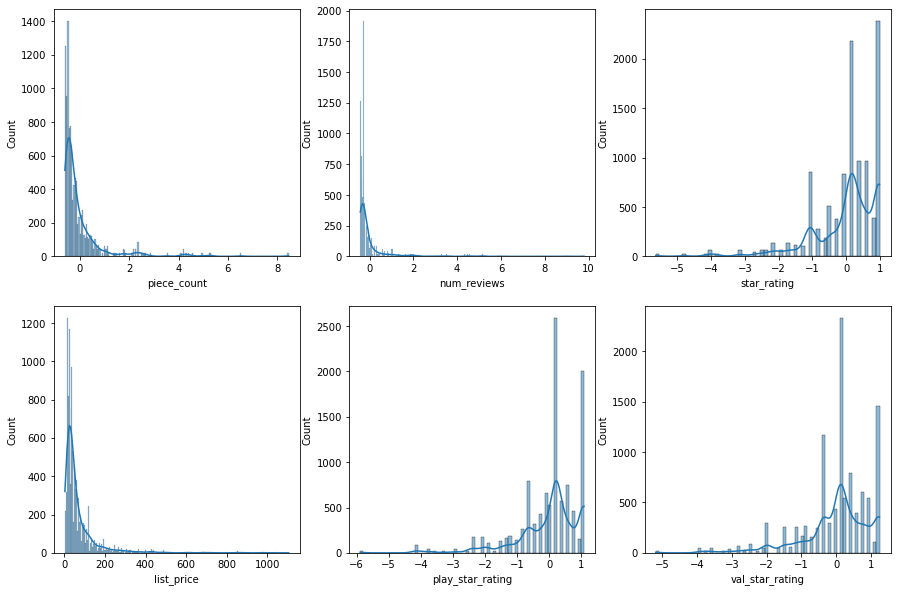

In [18]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
for i,j in enumerate(df.iloc[:,:6].columns):
    row = i//2
    column = i%2
    sns.histplot(df[j],kde=True,ax=ax[column][row]);
# 


Note how skewed most of these distributions are. While linear regression does not assume that each of the individual predictors are normally distributed, it does assume a linear relationship between the predictors and the target variable (`list_price` in this case). To further investigate if this assumption holds true, you can plot some single variable regression plots of each feature against the target variable using `seaborn`. 

## Check for Linearity

Recall that one assumption in linear regression is that the target variable is linearly related to the input features. As shown in the previous lesson, you can use the `sns.jointplot()` function to investigate whether this relation holds true for the various predictors on hand.

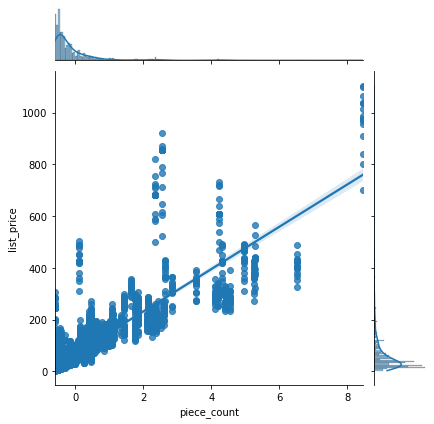

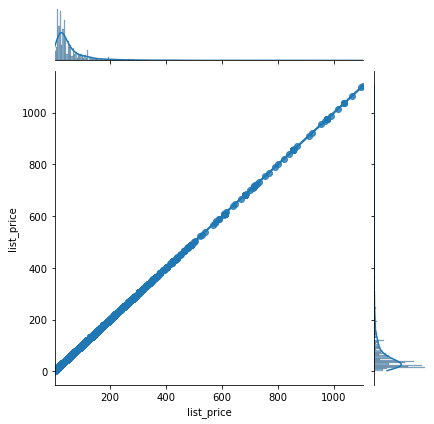

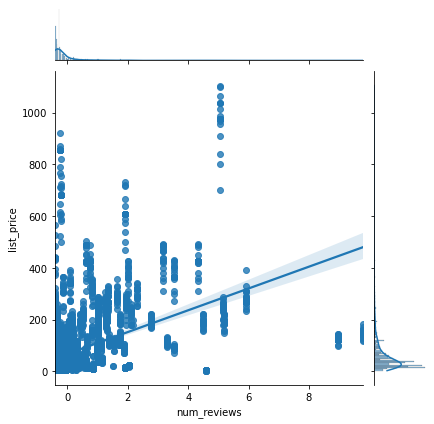

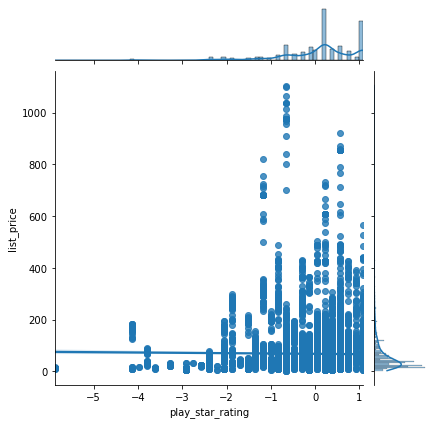

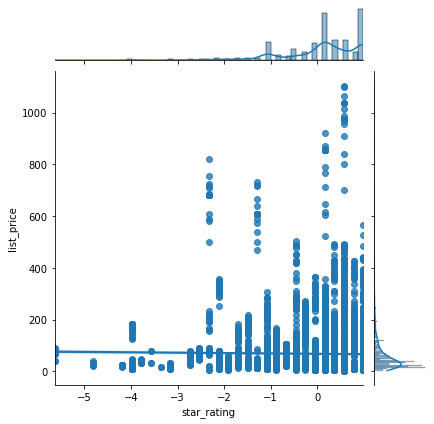

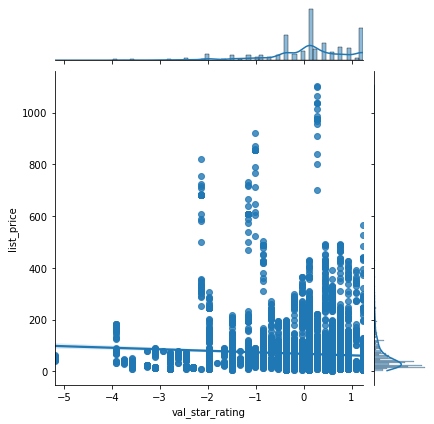

In [21]:
for i in df.iloc[:,:6].columns:
    sns.jointplot(x= i ,y='list_price' ,data= df, kind='reg')
    plt.show();

## Checking for Multicollinearity

It's also important to make note of whether your predictive features will result in multicollinearity in the resulting model. While definitive checks for multicollinearity require analyzing the resulting model, predictors with overly high pairwise-correlation (r > .65) are almost certain to produce multicollinearity in a model. With that, take a minute to generate the pairwise (pearson) correlation coefficients of your predictive features and visualize these coefficients as a heatmap.

<AxesSubplot:>

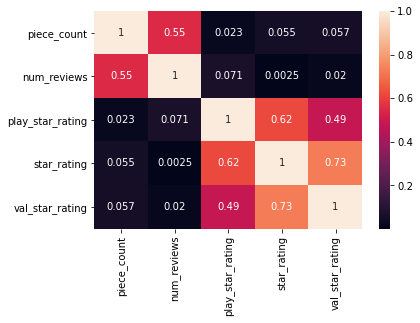

In [31]:
df2 = df.iloc[:,:6].drop(columns=['list_price']).corr().abs()
sns.heatmap(data=df2, annot=True)

In [33]:
import statsmodels.api as sm
y = df['list_price']
X = df.drop(columns=['list_price'])
model = sm.OLS(y,sm.add_constant(X))
result = model.fit()

In [34]:
# a p-value of 0.7 means that there is no significant difference to claim our relationship is not linear
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(result)

(0.9826996589664793, 0.7391847855153111)

In [35]:
df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df

,cc
pairs,
"(piece_count, piece_count)",1.000000
"(theme_name_Juniors, ages_4-7)",0.981459
"(theme_name_Classic, ages_4-99)",0.966894
"(ages_10+, theme_name_BrickHeadz)",0.891791
"(piece_count, list_price)",0.865094
...,...
"(country_NL, ages_1½-3)",0.000020
"(theme_name_City, country_CA)",0.000008
"(num_reviews, country_NL)",0.000008


In [36]:
df.head(50)

,cc
pairs,
"(piece_count, piece_count)",1.000000
"(theme_name_Juniors, ages_4-7)",0.981459
"(theme_name_Classic, ages_4-99)",0.966894
"(ages_10+, theme_name_BrickHeadz)",0.891791
"(piece_count, list_price)",0.865094
"(ages_12+, theme_name_Architecture)",0.835991
"(theme_name_DUPLO®, ages_2-5)",0.825645
"(ages_16+, theme_name_Creator Expert)",0.820996
"(theme_name_MINDSTORMS®, ages_10-21)",0.819085


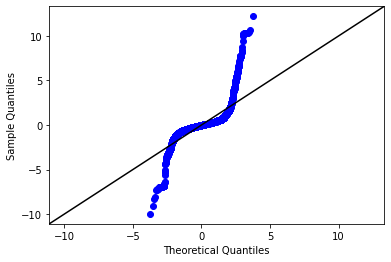

In [39]:
from scipy import stats
fig, ax = plt.subplots()
sm.graphics.qqplot(result.resid, dist=stats.norm, line='45', fit=True, ax=ax)
line = ax.lines[1]
line.set_color("black");

#Yikes, this is a bad model, straight up. 


In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        14:22:11   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10+                                           122.9923      5.753     21.378      0.000     111.715     134.270
ages_10-14                                         -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10-16                                         -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10-21                                          55.9674      6.415      8.725      0.000      43.393      68.542
ages_11-16                                         -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12+                                            70.5837      4.828     14.619      0.000      61.119      80.048
ages_12-16                                         -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14+                                            24.6493      3.579      6.887      0.000      17.634      31.665
ages_16+                                            32.9512      5.251      6.275      0.000      22.658      43.245
ages_1½-3                                           -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1½-5                                           -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2-5                                            14.9724      1.459     10.260      0.000      12.112      17.833
ages_4+                                            -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4-7                                            -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4-99                                           -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5+                                             -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5-12                                          -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5-8                                 

In [ ]:
# The p-values for JB and Omnibus also confirm that the residuals are not normally distributed. 

## Further Resources

Have a look at following resources on how to deal with complex datasets that don't meet our initial expectations:  

- [What to Do When Bad Data Thwarts Machine Learning Success](https://towardsdatascience.com/what-to-do-when-bad-data-thwarts-machine-learning-success-fb82249aae8b)

- [Practical advice for analysis of large, complex data sets ](http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html)

- [Data Cleaning Challenge: Scale and Normalize Data](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)

## Summary 

In this lesson you performed some initial EDA using descriptive statistics and data visualizations to check for regression assumptions. In the upcoming lessons, you'll continue to carry out a standard Data Science process and begin to fit and refine an initial model.